In [42]:
import pandas as pd
import numpy as np

postings = pd.read_csv('/Users/zacharysoriano/Downloads/archive (1)/postings.csv')

In [43]:
# cleaning the data

postings_clean = postings.drop(columns = ['fips', 'zip_code', 'normalized_salary', 'sponsored', 'posting_domain', 'listed_time', 'closed_time',
                                          'expiry', 'application_type', 'application_url', 'job_posting_url', 'original_listed_time', 'job_id',
                                           'remote_allowed', 'currency', 'views', 'company_id', 'applies', 'med_salary', 'skills_desc', 'work_type',
                                          'compensation_type'])
postings_clean = postings_clean.dropna()
postings_clean.reset_index(drop=True, inplace=True)
postings_clean.head(15)

,company_name,title,description,max_salary,pay_period,location,min_salary,formatted_work_type,formatted_experience_level
0,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...",70.0,HOURLY,"Foster City, CA",60.0,Contract,Mid-Senior level
1,ActOne Group,Administrative Assistant - CONCUR,Global Financial Services firm is seeking an e...,90000.0,YEARLY,"New York, NY",75000.0,Full-time,Associate
2,ABC Farigua Division,Customer Service Representative,We are seeking future agents to join our team!...,105000.0,YEARLY,"Greater Orlando, FL",75000.0,Full-time,Entry level
3,TECHEAD,Inbound Call Center Specialist,"Always Connecting, Always Evolving.\nIf you ar...",19.0,HOURLY,"Richmond, VA",18.0,Contract,Associate
4,Prolink,Tool and Die Maker,Job Summary:The Tool and Die Maker will build ...,35.0,HOURLY,Cincinnati Metropolitan Area,32.0,Full-time,Associate
5,"Dexterity, Inc.",Senior Mechanical Engineer,Senior Mechanical Engineer\nLocation: Redwood ...,190000.0,YEARLY,"Redwood City, CA",150000.0,Full-time,Mid-Senior level
6,Staff Management | SMX,Quality Engineer,Staff Management | SMX is currently in search ...,43.0,HOURLY,"New Albany, IN",28.0,Full-time,Associate
7,Ascendion,Quality Assurance Specialist,About Ascendion Ascendion is a full-service di...,72000.0,YEARLY,"Seattle, WA",60000.0,Full-time,Associate
8,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms","PREMIER BRANDS GROUP HOLDINGSIconic by Nature,...",95000.0,YEARLY,New York City Metropolitan Area,75000.0,Full-time,Mid-Senior level
9,Insight Global,Flight Software Engineer,Must Haves:10-15 years of experience with C++ ...,170000.0,YEARLY,"Webster, TX",140000.0,Full-time,Mid-Senior level


In [44]:
# make all salaries yearly
postings_clean['pay_period'].unique()
for i in range(len(postings_clean)):
    if postings_clean.loc[i, 'pay_period'] == 'YEARLY':
        postings_clean.loc[i, 'norm_max_salary'] = postings_clean.loc[i, 'max_salary'] 
        postings_clean.loc[i, 'norm_min_salary'] = postings_clean.loc[i, 'min_salary']
    elif postings_clean.loc[i, 'pay_period'] == 'HOURLY':
        postings_clean.loc[i, 'norm_max_salary'] = postings_clean.loc[i, 'max_salary'] * 40 * 52
        postings_clean.loc[i, 'norm_min_salary'] = postings_clean.loc[i, 'min_salary'] * 40 * 52
    elif postings_clean.loc[i, 'pay_period'] == 'MONTHLY':
        postings_clean.loc[i, 'norm_max_salary'] = postings_clean.loc[i, 'max_salary'] * 12
        postings_clean.loc[i, 'norm_min_salary'] = postings_clean.loc[i, 'min_salary'] * 12
    elif postings_clean.loc[i, 'pay_period'] == 'WEEKLY':
        postings_clean.loc[i, 'norm_max_salary'] = postings_clean.loc[i, 'max_salary'] * 52
        postings_clean.loc[i, 'norm_min_salary'] = postings_clean.loc[i, 'min_salary'] * 52
    # biweekly
    else:
        postings_clean.loc[i, 'norm_max_salary'] = postings_clean.loc[i, 'max_salary'] * 26
        postings_clean.loc[i, 'norm_min_salary'] = postings_clean.loc[i, 'min_salary'] * 26
postings_clean['salary_midpoint'] = (postings_clean['norm_max_salary'] + postings_clean['norm_min_salary']) / 2
len(postings_clean)
# to predict



23002

In [45]:
# let's only consider jobs with salaries from 10,000 to 500,000 dollars
salary = postings_clean['salary_midpoint']
postings_clean = postings_clean[(salary > 10000) & (salary < 500000)]
len(postings_clean)

# eliminated ~ 400 observations

22636

In [46]:
# Use NLP - Bag of Words (BOW) - to interpret descriptions
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(max_features=500, min_df=10, stop_words = 'english')
X_bow = v.fit_transform(postings_clean['description'])
y = postings_clean['salary_midpoint']


In [47]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size = 0.2, random_state = 1)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# BOW + Linear Regression
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))



1893571513.6432588


In [49]:
# huge MSE, model is predicting negative salaries
print(y_test.min(), y_pred.min())


22880.0 -84383.94802075496


In [50]:
# log transform salary
postings_clean['log_salary_midpoint'] = np.log(postings_clean['salary_midpoint'])
y = postings_clean['log_salary_midpoint']
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size = 0.2, random_state = 1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))


0.14020045544539142


In [51]:
# which words cause an increase/decrease in expected salary?

# our dictionary
words = v.get_feature_names_out()
coefficients = model.coef_

words_coefs_df = pd.DataFrame({'words': words, 'coefficients': coefficients})
words_coefs_df = words_coefs_df.sort_values('coefficients', ascending = False)
words_coefs_df = words_coefs_df.reset_index(drop = True)

print(words_coefs_df.head(10), words_coefs_df.tail(10), sep = '\n\n')

# coefficients in log scale


        words  coefficients
0    practice      0.055945
1  expression      0.051197
2       large      0.044302
3  california      0.043250
4    religion      0.040836
5    director      0.038364
6      proven      0.033628
7        firm      0.033083
8     receive      0.031919
9    platform      0.030521

         words  coefficients
490     school     -0.034716
491      daily     -0.035992
492  associate     -0.037775
493      paced     -0.037878
494     assist     -0.037928
495        age     -0.041899
496         30     -0.048593
497      excel     -0.050349
498       hour     -0.054408
499         50     -0.066558


Text(0, 0.5, 'Frequency')

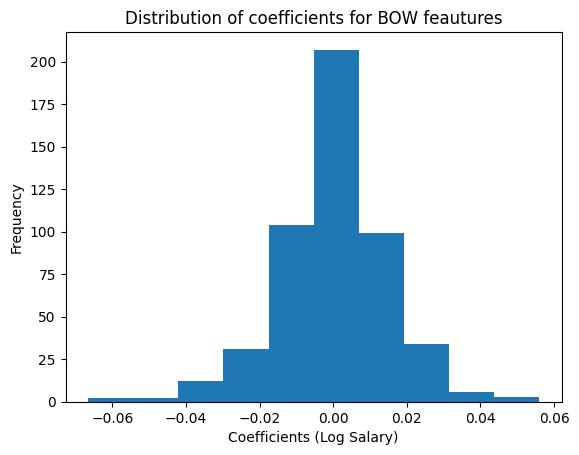

In [52]:
import matplotlib.pyplot as plt

plt.hist(words_coefs_df['coefficients'])
plt.title('Distribution of coefficients for BOW feautures') 
plt.xlabel('Coefficients (Log Salary)')
plt.ylabel('Frequency')


' practice — referring to law practice, medical practice, etc., which usually links to higher pay.\n\nexpression — this one’s a bit vague, but might occur in technical, legal, or creative high-skill contexts.\n\nlarge — often signals bigger organizations, which tend to pay more.\n\ncalifornia — region effect; California salaries skew higher.\n\nreligion — interesting; could be linked to specialized academic or nonprofit work (might be worth checking if this is just noise or niche high-paying roles).\n\ndirector — makes perfect sense, senior role title.\n\nproven — classic in senior job postings (“proven track record”); often higher-level hiring language.\n\nfirm — probably legal/consulting firms, which skew higher pay.\n\nreceive — might appear in benefits descriptions (“receive annual bonus”), could be correlated with higher-paying jobs that list perks.\n\nplatform — likely tech-related jobs (software platforms), which can be high-paying. '

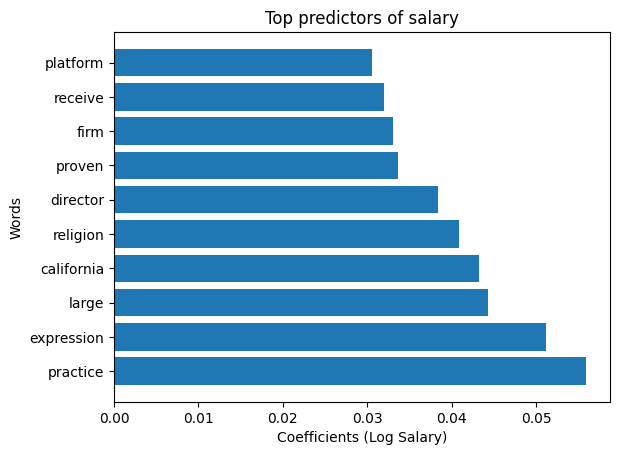

In [53]:
plt.barh(words_coefs_df['words'].head(10), words_coefs_df['coefficients'].head(10))
plt.title('Top predictors of salary') 
plt.xlabel('Coefficients (Log Salary)')
plt.ylabel('Words')
""" practice — referring to law practice, medical practice, etc., which usually links to higher pay.

expression — this one’s a bit vague, but might occur in technical, legal, or creative high-skill contexts.

large — often signals bigger organizations, which tend to pay more.

california — region effect; California salaries skew higher.

religion — interesting; could be linked to specialized academic or nonprofit work (might be worth checking if this is just noise or niche high-paying roles).

director — makes perfect sense, senior role title.

proven — classic in senior job postings (“proven track record”); often higher-level hiring language.

firm — probably legal/consulting firms, which skew higher pay.

receive — might appear in benefits descriptions (“receive annual bonus”), could be correlated with higher-paying jobs that list perks.

platform — likely tech-related jobs (software platforms), which can be high-paying. """

In [54]:
raw_rent_prices = pd.read_csv('/Users/zacharysoriano/Downloads/archive/price.csv')

# Keep only City and January 2017 columns
city_rent_prices = raw_rent_prices[['City', 'January 2017']]

# Group by City and take the mean to remove duplicates
city_rent_prices = city_rent_prices.groupby('City', as_index=False)['January 2017'].mean()

city_rent_prices

,City,January 2017
0,Abbeville,1012.666667
1,Abbottstown,1154.000000
2,Aberdeen,1096.000000
3,Abernathy,935.000000
4,Abilene,954.000000
...,...,...
9665,Zionsville,2229.000000
9666,Zionville,1192.000000
9667,Zirconia,1269.000000
9668,Zumbrota,1350.000000


In [55]:
postings_clean['City'] = postings_clean['location'].str.split(',').str[0].str.strip()
postings_clean['State'] = postings_clean['location'].str.split(',').str[1].str.strip()

# Merge with average rent prices by city
postings_clean = pd.merge(postings_clean, city_rent_prices, on='City', how='left')

postings_clean['rent_price'] = postings_clean['January 2017']

postings_clean = postings_clean.drop(columns=['January 2017'])
postings_clean = postings_clean.dropna()

postings_clean

,company_name,title,description,max_salary,pay_period,location,min_salary,formatted_work_type,formatted_experience_level,norm_max_salary,norm_min_salary,salary_midpoint,log_salary_midpoint,City,State,rent_price
0,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS","Validation Engineer, Labware LIMSFoster City, ...",70.0,HOURLY,"Foster City, CA",60.0,Contract,Mid-Senior level,145600.0,124800.0,135200.0,11.814510,Foster City,CA,4351.000000
1,ActOne Group,Administrative Assistant - CONCUR,Global Financial Services firm is seeking an e...,90000.0,YEARLY,"New York, NY",75000.0,Full-time,Associate,90000.0,75000.0,82500.0,11.320554,New York,NY,2322.000000
3,TECHEAD,Inbound Call Center Specialist,"Always Connecting, Always Evolving.\nIf you ar...",19.0,HOURLY,"Richmond, VA",18.0,Contract,Associate,39520.0,37440.0,38480.0,10.557894,Richmond,VA,1403.666667
5,"Dexterity, Inc.",Senior Mechanical Engineer,Senior Mechanical Engineer\nLocation: Redwood ...,190000.0,YEARLY,"Redwood City, CA",150000.0,Full-time,Mid-Senior level,190000.0,150000.0,170000.0,12.043554,Redwood City,CA,4008.000000
6,Staff Management | SMX,Quality Engineer,Staff Management | SMX is currently in search ...,43.0,HOURLY,"New Albany, IN",28.0,Full-time,Associate,89440.0,58240.0,73840.0,11.209656,New Albany,IN,1795.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22629,"TalentBurst, an Inc 5000 company",Research And Development Engineer,"Position: R&D Engineer I, Req#: 6477-1Location...",43.0,HOURLY,"Irvine, CA",30.0,Temporary,Mid-Senior level,89440.0,62400.0,75920.0,11.237435,Irvine,CA,3145.000000
22631,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",35.0,Contract,Mid-Senior level,93600.0,72800.0,83200.0,11.329003,Irvine,CA,3145.000000
22633,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",30.0,Contract,Mid-Senior level,104000.0,62400.0,83200.0,11.329003,Irvine,CA,3145.000000
22634,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",120000.0,Full-time,Mid-Senior level,195000.0,120000.0,157500.0,11.967181,Walnut Creek,CA,3272.000000


In [56]:
# we will use OHE (onehot encoding) for experience level
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# we will use tf-idf for job descriptions
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features = 5000)

# we will use a column transformer to take multiple different types of features into our model (sparse matrices, single columns, etc)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([('description', tf_idf, 'description'),
                                  ('rent', 'passthrough', ['rent_price']),
                                  ('experience', ohe, ['formatted_experience_level'])])
pipe = Pipeline([('preprocessor' , preprocessor), ('model', LinearRegression())])

y = postings_clean['log_salary_midpoint']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(postings_clean, y, test_size = 0.2, random_state = 1)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.08559053635288726


In [58]:
import torch, transformers, datasets, evaluate, accelerate, tqdm

In [59]:
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, DataCollatorWithPadding
)
from datasets import Dataset
import torch


In [60]:
model_name   = "distilbert-base-uncased"  
test_size    = 0.20
seed         = 42
train_bs     = 4
eval_bs      = 4
epochs       = 1
lr           = 2e-5
num_threads  = 4

torch.set_num_threads(num_threads)

# Expecting postings_clean with columns: 'description' and 'log_salary_midpoint'
df = postings_clean[['description', 'log_salary_midpoint']].dropna().copy()
df = df[df['description'].str.len() > 0]
df = df.rename(columns={'log_salary_midpoint': 'labels'})  # Trainer expects 'labels'

ds = Dataset.from_pandas(df, preserve_index=False)
splits = ds.train_test_split(test_size=test_size, seed=seed)
train_data, eval_data = splits["train"], splits["test"]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["description"], truncation=True)

tokenized_train = train_data.map(tokenize_function, batched=True, remove_columns=["description"])
tokenized_eval  = eval_data.map(tokenize_function,  batched=True, remove_columns=["description"])

/opt/anaconda3/envs/salary-bert/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)
model.config.problem_type = "regression"

mse_metric = evaluate.load("mse")

def compute_metrics(eval_pred):
    preds, labels = eval_pred
    preds = np.squeeze(preds)
    mse = mse_metric.compute(predictions=preds, references=labels)["mse"]
    rmse = float(np.sqrt(mse))
    return {"mse": mse, "rmse": rmse}

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir="./salary_model_distilbert",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=lr,
    per_device_train_batch_size=train_bs,
    per_device_eval_batch_size=eval_bs,
    num_train_epochs=epochs,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    use_cpu=True,
    report_to="none",
    optim="adamw_torch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()
eval_out = trainer.evaluate()
print("Evaluation:", eval_out)